[1.46551644e-03 1.48466034e-03 1.76977822e-03 1.79761540e-03
 1.80684833e-03 1.84352657e-03 1.85262847e-03 2.04406216e-03
 2.14692592e-03 2.17667345e-03 2.38496518e-03 2.38972769e-03
 2.39899626e-03 2.39899626e-03 2.42064732e-03 2.46640594e-03
 2.48450636e-03 2.38380954e-03 2.22468059e-03 2.22468059e-03
 1.97457555e-03 1.33949989e-03 8.16964546e-04 4.16963354e-04
 1.73982041e-05]


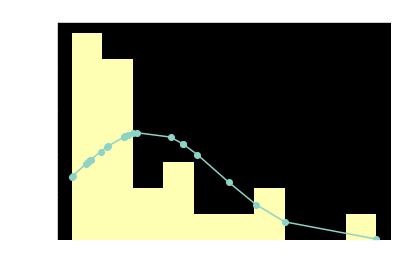

In [1]:
#%matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm

#import pylab as pl

import json

# VUL HIER DE GEWENSTE KIESKRING EN PARTIJ IN, PARTIJ HEEFT EEN NUMMER
KieskringNaam = "Merchtem"
Partijnummer = 3
# IS BIJNA ALTIJD DEZE PARTIJEN (WE GEBRUIKEN NUMMERS OMDAT DE NAMEN KUNNEN VERANDEREN ADHV COALITIES)
# 1 = SPA
# 2 = NVA
# 3 = CD&V
# 4 = GROEN
# 5 = VLAAMS BELANG
# 6 = OPEN VLD
# 7 = LIJST A
# 8 = PVDA



# variabele om requested data in te plaatsen
kieskringdata = urllib.request.urlopen("http://www.rocre.be/verkiezingen/json.php?fields=kieskring,naamstemmen,naam,id,lijstnr&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)

# Een nieuwe lokale lijst maken van de stemmen
kieskring_stemmen = list()

# Omdat de json data in een wrapper van results zit dit gaan vervangen zodat de code op volgende lijnen korter is.
data = data["results"]

# Gaan kijken voor de gekozen kieskring en partij of er data inzit en deze dan bijhouden in de lokale lijst
for x in data:
    if(x["kieskring"] == KieskringNaam and int(x["lijstnr"]) == Partijnummer):
        kieskring_stemmen.append(int(x["naamstemmen"]))
# als er geen stemmen zijn moet het programma stoppen 
if(len(kieskring_stemmen) == 0) :
        print("ERROR")
        exit()
# de stemmen van klein naar groot gaan sorteren
kieskring_stemmen = sorted(kieskring_stemmen)

# de Y as gaan bepalen adhv de normaalverdeling
y = norm.pdf(kieskring_stemmen, np.mean(kieskring_stemmen), np.std(kieskring_stemmen))
plt.plot(kieskring_stemmen,y,'-o')

print(y)


plt.xlabel("Aantal stemmen")
plt.ylabel("Kansdichtheid")
plt.title("Stelling 1 in : " + KieskringNaam + " voor partijnr : "  + str(Partijnummer))

# Een histogram tekenen om makkelijk te gaan kijken of het een normaalverdeling is
plt.hist(kieskring_stemmen,density=True)
plt.show()

# We kunnnen duidelijk zien dat het geen normaalverdeling is



C:\Users\Tijs De Belie\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


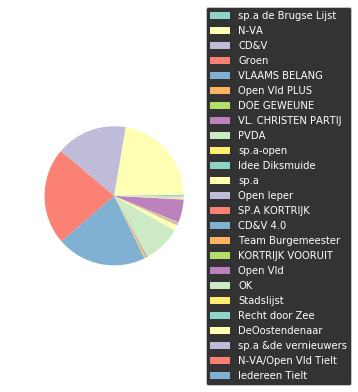

In [2]:
#%matplotlib inline

# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm

#import pylab as pl

import json

# VUL HIER DE GEWENSTE KIESKRING EN PARTIJ IN, PARTIJ HEEFT EEN NUMMER


KieskringArray = ['Brugge', 'Diksmuide', 'Kortrijk',
                  'Roeselare', 'Tielt', 'Ieper', 'Oostende']
kieskring = list()
kieskring.append({"gemeente":"dsfdfsd", "partij":"sdfdsfsf"})
# IS BIJNA ALTIJD DEZE PARTIJEN (WE GEBRUIKEN NUMMERS OMDAT DE NAMEN KUNNEN VERANDEREN ADHV COALITIES)
# 1 = SPA
# 2 = NVA
# 3 = CD&V
# 4 = GROEN
# 5 = VLAAMS BELANG
# 6 = OPEN VLD
# 7 = LIJST A
# 8 = PVDA

# variabele om requested data in te plaatsen
kieskringdata = urllib.request.urlopen(
    "http://www.rocre.be/verkiezingen/json.php?fields=kieskring,id,lijstnr,lijst,kiezers&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)

# Een nieuwe lokale lijst maken van de stemmen
kieskring_partij = list()
kieskring_kiezers = list()
# Omdat de json data in een wrapper van results zit dit gaan vervangen zodat de code op volgende lijnen korter is.
data = data["results"]


found = False
def search(gemeente, partij):
       for d in kieskring:
            if(partij in d.values() and gemeente in d.values()):
                return True
            else: 
                found = False
       return found


for x in data:
    if(x["kieskring"] in KieskringArray):
     if(search(x["kieskring"], x["lijst"]) == False):
        if(x["lijst"] in kieskring_partij):
             index = kieskring_partij.index(x["lijst"])
             kieskring_kiezers[index] += float(x["kiezers"])
        else:
         kieskring_partij.append(x["lijst"])
         kieskring_kiezers.append(float(x["kiezers"]))
         thisdict = {
             "gemeente": x["kieskring"],
             
             "partij": x["lijst"]
         }
         kieskring.append(thisdict)


plt.pie(kieskring_kiezers, labels=kieskring_partij)
ax = plt.subplot(111)
plt.rcParams.update({'font.size': 10})
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

